In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Zomato-data-.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
#Data cleaning
df['online_order']=df['online_order'].str.strip().str.lower()
df['book_table']=df['book_table'].str.strip().str.lower()
#Data cleaning - removing denom for rating out of 5
def Handlerate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)
df['rate']=df['rate'].apply(Handlerate)
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,yes,yes,4.1,775,800,Buffet
1,Spice Elephant,yes,no,4.1,787,800,Buffet
2,San Churro Cafe,yes,no,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,no,no,3.7,88,300,Buffet
4,Grand Village,no,no,3.8,166,600,Buffet


/tmp/ipython-input-6-1707250241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='listed_in(type)', order=df['listed_in(type)'].value_counts().index, palette='viridis')


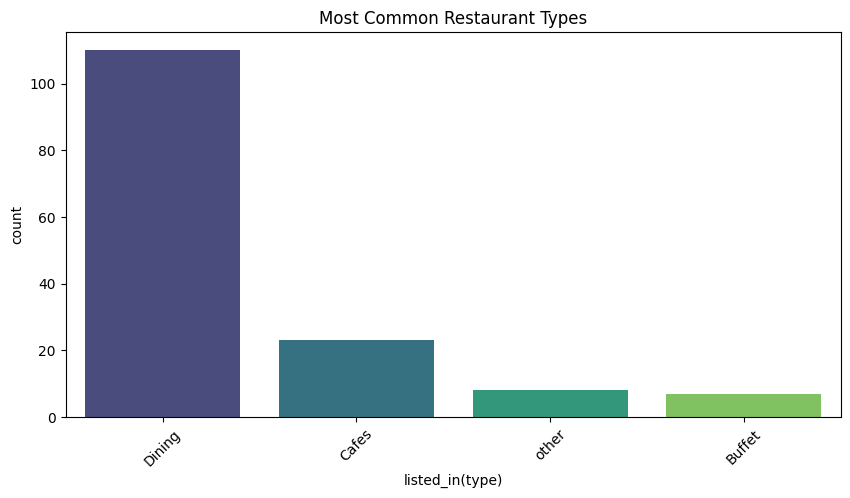

In [6]:

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='listed_in(type)', order=df['listed_in(type)'].value_counts().index, palette='viridis')
plt.title("Most Common Restaurant Types")
plt.xticks(rotation=45)
plt.show()

Conclusion: Dining restaurants are preferred by a larger number of individuals


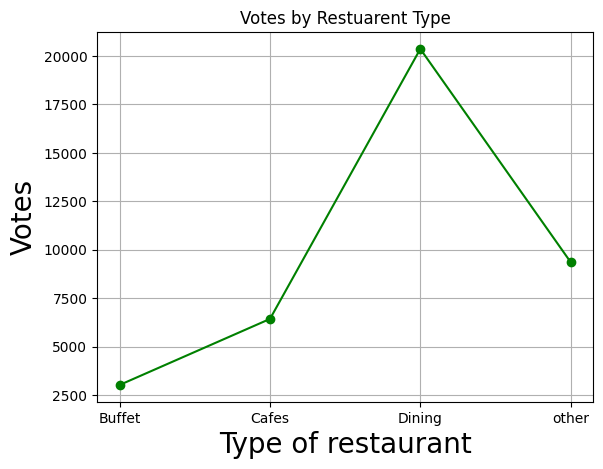

In [38]:
#Votes by Restaurant Type
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.title("Votes by Restuarent Type")
plt.grid(True)
plt.xlabel('Type of restaurant',  size=20)
plt.ylabel('Votes',  size=20)
print("Conclusion: Dining restaurants are preferred by a larger number of individuals")

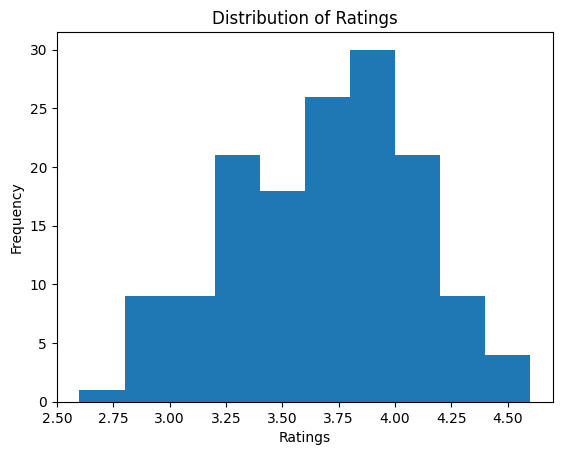

The majority of restaurants received ratings ranging from 3.5 to 4.


In [40]:
#Analyze Ratings
plt.hist(df['rate'],bins=10)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()
print("The majority of restaurants received ratings ranging from 3.5 to 4.")

Text(0.5, 0, 'Online Order Availability')

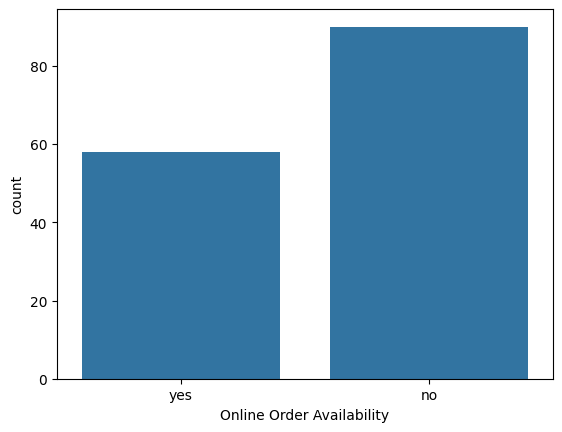

In [39]:
#Online Order Availability
sns.countplot(x=df['online_order'])
plt.xlabel('Online Order Availability')

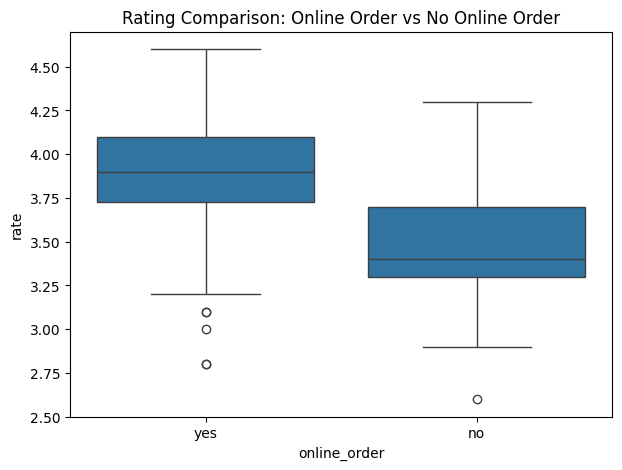

Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.


In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='online_order', y='rate')
plt.title("Rating Comparison: Online Order vs No Online Order")
plt.show()
print("Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.")


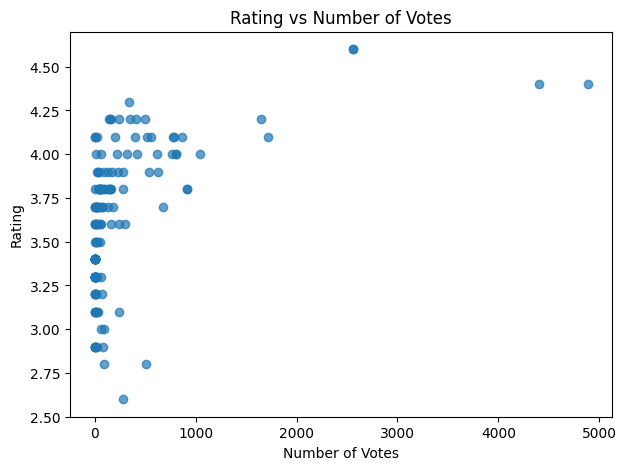

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(data=df,x='votes',y='rate',alpha=0.7)
plt.title("Rating vs Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()

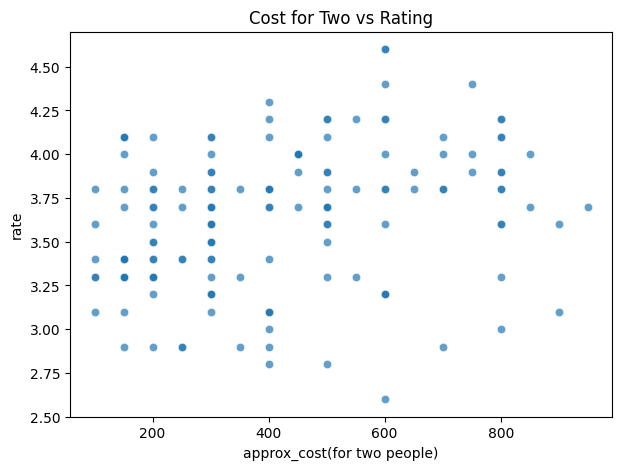

There is no strong correlation between the price (cost for two) and the rating of a restaurant.


In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate', alpha=0.7)
plt.title("Cost for Two vs Rating")
plt.show()
print("There is no strong correlation between the price (cost for two) and the rating of a restaurant.")


In [26]:
df[['approx_cost(for two people)', 'rate']].corr()


,approx_cost(for two people),rate
approx_cost(for two people),1.000000,0.275216
rate,0.275216,1.000000


/tmp/ipython-input-24-1388243160.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='rate', y='name',palette='viridis')


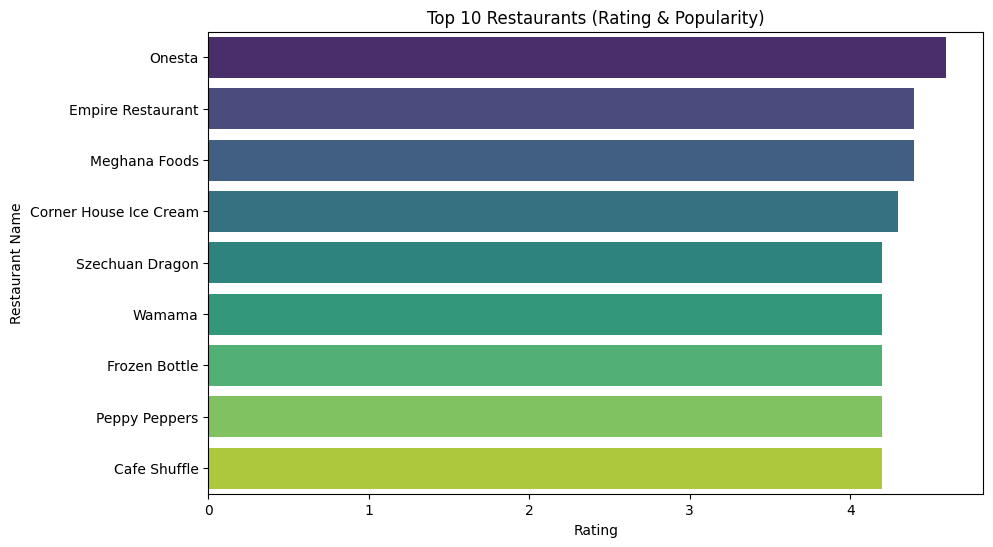

In [24]:
# top 10 highest-rated restaurants (with >100 votes)?
top10 = df[df['votes'] > 100].sort_values(by='rate', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='rate', y='name',palette='viridis')
plt.title("Top 10 Restaurants (Rating & Popularity)")
plt.xlabel("Rating")
plt.ylabel("Restaurant Name")
plt.show()



Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.


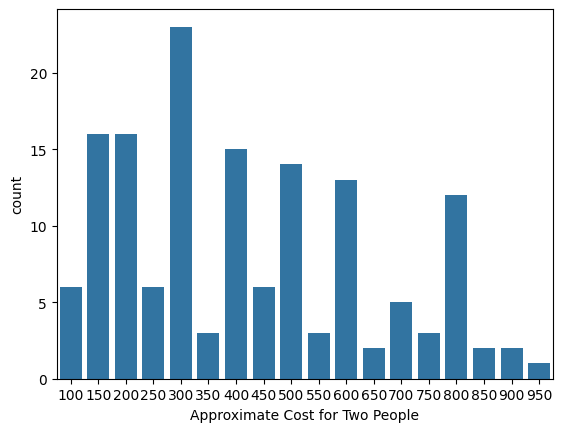

In [27]:
#Approximate Cost for Couples
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('Approximate Cost for Two People')
print("Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.")

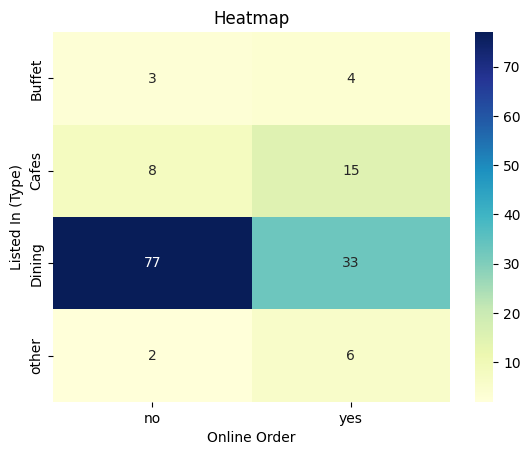

Conclusion: Dining restaurants primarily accept offline orders whereas 

cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.


In [28]:
#Order Mode Preferences by Restaurant Type
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()
print("Conclusion: Dining restaurants primarily accept offline orders whereas \n" )
print("cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.")

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns
X = df[['approx_cost(for two people)', 'rate']].dropna()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X_scaled)

# Add cluster to original dataframe
df_clustered = df.copy()
df_clustered['cluster'] = -1
df_clustered.loc[X.index, 'cluster'] = X['cluster']


/tmp/ipython-input-33-1171592053.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate', palette='Set1')


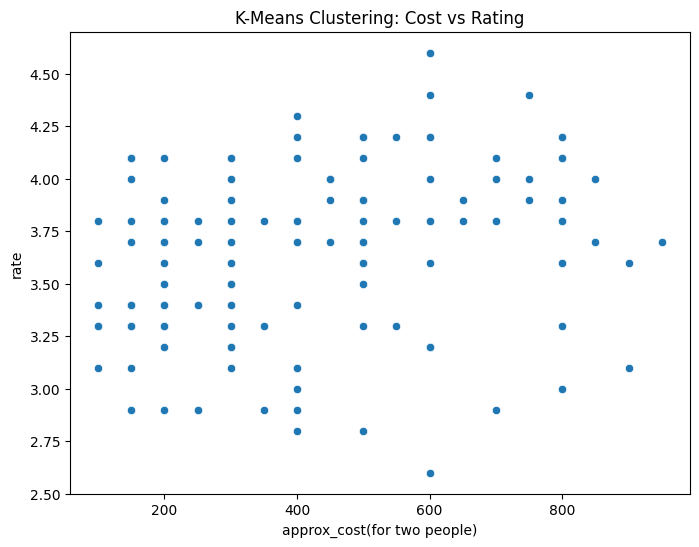

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate', palette='Set1')
plt.title('K-Means Clustering: Cost vs Rating')
plt.show()


In [35]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,yes,yes,4.1,775,800,Buffet
1,Spice Elephant,yes,no,4.1,787,800,Buffet
2,San Churro Cafe,yes,no,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,no,no,3.7,88,300,Buffet
4,Grand Village,no,no,3.8,166,600,Buffet


In [36]:
def recommend_top_restaurants(rtype):
    return df[df['listed_in(type)'] == rtype].sort_values(by=['rate', 'votes'], ascending=[False, False]).head(5)

# Example: Top 5 Buffets
recommend_top_restaurants('Buffet')


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
1,Spice Elephant,yes,no,4.1,787,800,Buffet
0,Jalsa,yes,yes,4.1,775,800,Buffet
2,San Churro Cafe,yes,no,3.8,918,800,Buffet
5,Timepass Dinner,yes,no,3.8,286,600,Buffet
4,Grand Village,no,no,3.8,166,600,Buffet
